In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

#### 1. Find the linear regression equation for this data.

In [3]:
cricket_reg = linear_model.LinearRegression()

In [7]:
cricket_reg.fit(df['Ground Temperature'].values.reshape(-1,1), df['Chirps/Second'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
cricket_reg.coef_

array([[0.20299973]])

For `Ground Temperature` between 60 and 100 degrees F:

`Chirps/Second` = 0.20299973 * `Ground Temperature`

#### 2. Chart thee original data and the equation on the chart.

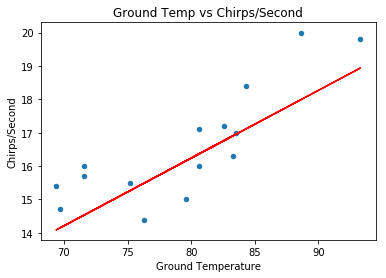

In [17]:
df.plot.scatter('Ground Temperature', 'Chirps/Second', title='Ground Temp vs Chirps/Second')
plt.plot(df['Ground Temperature'], df['Ground Temperature']*0.20299973, 'r')
plt.show()

#### 3. Find the equation's $R^2$ score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [19]:
cricket_reg.score(df['Ground Temperature'].values.reshape(-1,1),
                  df['Chirps/Second'].values.reshape(-1,1))

0.6922946529146998

##### There is not a strong correlation between `Ground Temperature` and `Chirps/Second`.

##### 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [22]:
chirp_rate95 = 95 * 0.20299973
print('Expected chirp rate at 95 degrees {} Chirps/Second (approximate)'.format(chirp_rate95))

Expected chirp rate at 95 degrees 19.28497435 Chirps/Second (approximate)


#### 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. 

#### What was the approximate ground temperature that morning?

In [23]:
ground_temp18 = 18 / 0.20299973
print('Approximate ground temp that morning was {} degrees F'.format(ground_temp18))

Approximate ground temp that morning was 88.67006867447559 degrees F


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [24]:
df = pd.read_fwf("brain_body.txt")

#### 1. Find the linear regression equation for this data for brain weight to body weight.

In [25]:
brain_reg = linear_model.LinearRegression()

In [29]:
brain_reg.fit(df['Body'].values.reshape(-1,1),
              df['Brain'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
brain_reg.coef_

array([[0.90291295]])

`Brain` weight = `Body` weight * 0.90291295

#### 2. Chart the original data and the equation on the chart.

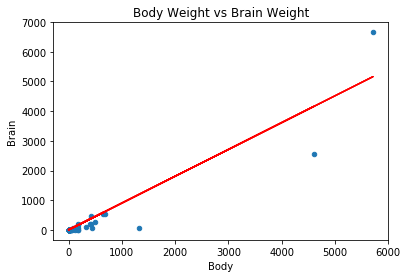

In [31]:
df.plot.scatter('Body', 'Brain', title='Body Weight vs Brain Weight')
plt.plot(df['Body'], df['Body']*0.90291295, 'r')
plt.show()

#### 3. Find the equation's  $R^2$ score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [32]:
brain_reg.score(df['Body'].values.reshape(-1,1),
              df['Brain'].values.reshape(-1,1))

0.8726620843043331

The regression is a good fit for this data.

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [33]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

#### 1. Find the linear regression equation for this data using columns 1-5 to column 6.

In [44]:
sex_reg = linear_model.LinearRegression()
rank_reg = linear_model.LinearRegression()
year_reg = linear_model.LinearRegression()
degree_reg = linear_model.LinearRegression()
ysdeg_reg = linear_model.LinearRegression()

In [45]:
sex_reg.fit(df['Sex'].values.reshape(-1,1), df['Salary'].values.reshape(-1,1))
rank_reg.fit(df['Rank'].values.reshape(-1,1), df['Salary'].values.reshape(-1,1))
year_reg.fit(df['Year'].values.reshape(-1,1), df['Salary'].values.reshape(-1,1))
degree_reg.fit(df['Degree'].values.reshape(-1,1), df['Salary'].values.reshape(-1,1))
ysdeg_reg.fit(df['YSdeg'].values.reshape(-1,1), df['Salary'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
print('Sex coefficient {}'.format(sex_reg.coef_))
print('Rank coefficient {}'.format(rank_reg.coef_))
print('Year coefficient {}'.format(year_reg.coef_))
print('Degree coefficient {}'.format(degree_reg.coef_))
print('Years since degree coefficient {}'.format(ysdeg_reg.coef_))

Sex coefficient [[-3339.64661654]]
Rank coefficient [[5952.77890467]]
Year coefficient [[752.79775742]]
Degree coefficient [[-858.86928105]]
Years since degree coefficient [[390.64512637]]


#### 2. Find the selection of columns with the best  $R^2$ score.

In [48]:
print('Sex R^2 score: {}'.format(sex_reg.score(df['Sex'].values.reshape(-1,1), df['Salary'].values.reshape(-1,1))))
print('Rank R^2 score: {}'.format(rank_reg.score(df['Rank'].values.reshape(-1,1), df['Salary'].values.reshape(-1,1))))
print('Year R^2 score: {}'.format(year_reg.score(df['Year'].values.reshape(-1,1), df['Salary'].values.reshape(-1,1))))
print('Degree R^2 score: {}'.format(degree_reg.score(df['Degree'].values.reshape(-1,1), df['Salary'].values.reshape(-1,1))))
print('Years sincee degree R^2 score: {}'.format(ysdeg_reg.score(df['YSdeg'].values.reshape(-1,1), df['Salary'].values.reshape(-1,1))))

Sex R^2 score: 0.06389892583288004
Rank R^2 score: 0.7525360539274634
Year R^2 score: 0.49093702676921624
Degree R^2 score: 0.004861680984748374
Years sincee degree R^2 score: 0.45542813458360276


Sex has very little influence on salary compared to position rank, and years in the current position rank.

# Part 2

## What is the geometric interpretation of why ridge and lasso are different? Why does this matter? What happens to the parameters in each case.

Geometrically, ridge regression is a represented as a ball or circle in two dimensions, while lasso is represented by a square.  This matters because lasso induces sparsity, while ridge regression does not.

## Implement Linear Regression (ols; any way you like). Fit random data, and plot your model’s best fit line and dataset.

In [64]:
def ols(x, y):
    b = x * y / (x.T * x)
    b_predict = np.sum(b) / len(x)
    return b_predict

In [65]:
ols(np.array([7,8,9]), np.array([0,1,2]))

0.11574074074074074

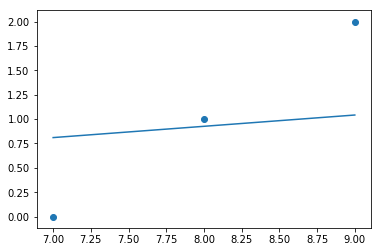

In [66]:
plt.scatter([7,8,9], [0,1,2])
plt.plot([7,8,9], np.array([7,8,9]) *0.11574074074074074)
plt.show()

## Would you ever use gradient descent to solve this problem?

Only if it was necessary to optimize the processing time, or performance.  It would not be necessary with the example data set.